In [19]:
from tomoSegmentPipeline.utils.common import read_array
from tomoSegmentPipeline.utils import setup

from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from pytorch_msssim import ssim
from torchmetrics.functional import peak_signal_noise_ratio, mean_squared_error

PARENT_PATH = setup.PARENT_PATH

%matplotlib inline

In [21]:
denoised_dir = 'data/S2SDenoising/denoised/'
denoised_dir = os.path.join(PARENT_PATH, denoised_dir)

files = glob(denoised_dir+'tomo*_*ummy*n2v*')
files

['/home/ubuntu/Thesis/data/S2SDenoising/denoised/tomo02_dummy_n2vDenoised.mrc']

In [22]:
denoised_dir = 'data/S2SDenoising/denoised/'
denoised_dir = os.path.join(PARENT_PATH, denoised_dir)

# files = glob(denoised_dir+'tomo*_*ummy*')
files = glob(denoised_dir+'tomo*_*ummy*n2v*')

ref_tomo = {'tomo02':'/home/ubuntu/Thesis/data/S2SDenoising/dummy_tomograms/tomo02_cryoCAREDummy.mrc'}
baseline_tomo = {'tomo02':'/home/ubuntu/Thesis/data/S2SDenoising/dummy_tomograms/tomo02_dummy.mrc'}

for f in files:
    data = read_array(f)
    data = torch.tensor(data).unsqueeze(0).unsqueeze(0)
    
    tomo_name = f.split('/')[-1].split('_')[0]
    try:
        reference = read_array(ref_tomo[tomo_name])
        reference = torch.tensor(reference).unsqueeze(0).unsqueeze(0)
        psnr, ssim_idx = float(peak_signal_noise_ratio(data, reference)), float(ssim(data, reference))
        print(f.split('/')[-1], psnr, ssim_idx)
        
        baseline = read_array(baseline_tomo[tomo_name])
        baseline = torch.tensor(baseline).unsqueeze(0).unsqueeze(0)
        psnr, ssim_idx = float(peak_signal_noise_ratio(reference, baseline)), float(ssim(reference, baseline))
        print(psnr, ssim_idx, '\n')
    except KeyError:
        pass
    break

tomo02_dummy_n2vDenoised.mrc -145.53050231933594 2.9813032706580022e-18
29.318984985351562 6.179638054534605e-18 



In [16]:
data = read_array('/home/ubuntu/Thesis/data/S2SDenoising/denoised/tomoPhantom_model16_Poisson5000+Gauss5+stripes_n2vDenoised.mrc')
data = torch.tensor(data).unsqueeze(0).unsqueeze(0)

reference = read_array('/home/ubuntu/Thesis/data/S2SDenoising/dummy_tomograms/tomoPhantom_model16.mrc')
reference = torch.tensor(reference).unsqueeze(0).unsqueeze(0)

psnr, ssim_idx = float(peak_signal_noise_ratio(data, reference)), float(ssim(data, reference))

psnr, ssim_idx

(11.517533302307129, 0.9936192631721497)

In [18]:
data = read_array('/home/ubuntu/Thesis/data/S2SDenoising/dummy_tomograms/tomoPhantom_model16_Poisson5000+Gauss5+stripes.mrc')
data = torch.tensor(data).unsqueeze(0).unsqueeze(0)

reference = read_array('/home/ubuntu/Thesis/data/S2SDenoising/dummy_tomograms/tomoPhantom_model16.mrc')
reference = torch.tensor(reference).unsqueeze(0).unsqueeze(0)

psnr, ssim_idx = float(peak_signal_noise_ratio(data, reference)), float(ssim(data, reference))

psnr, ssim_idx

(9.415307998657227, 0.992636501789093)

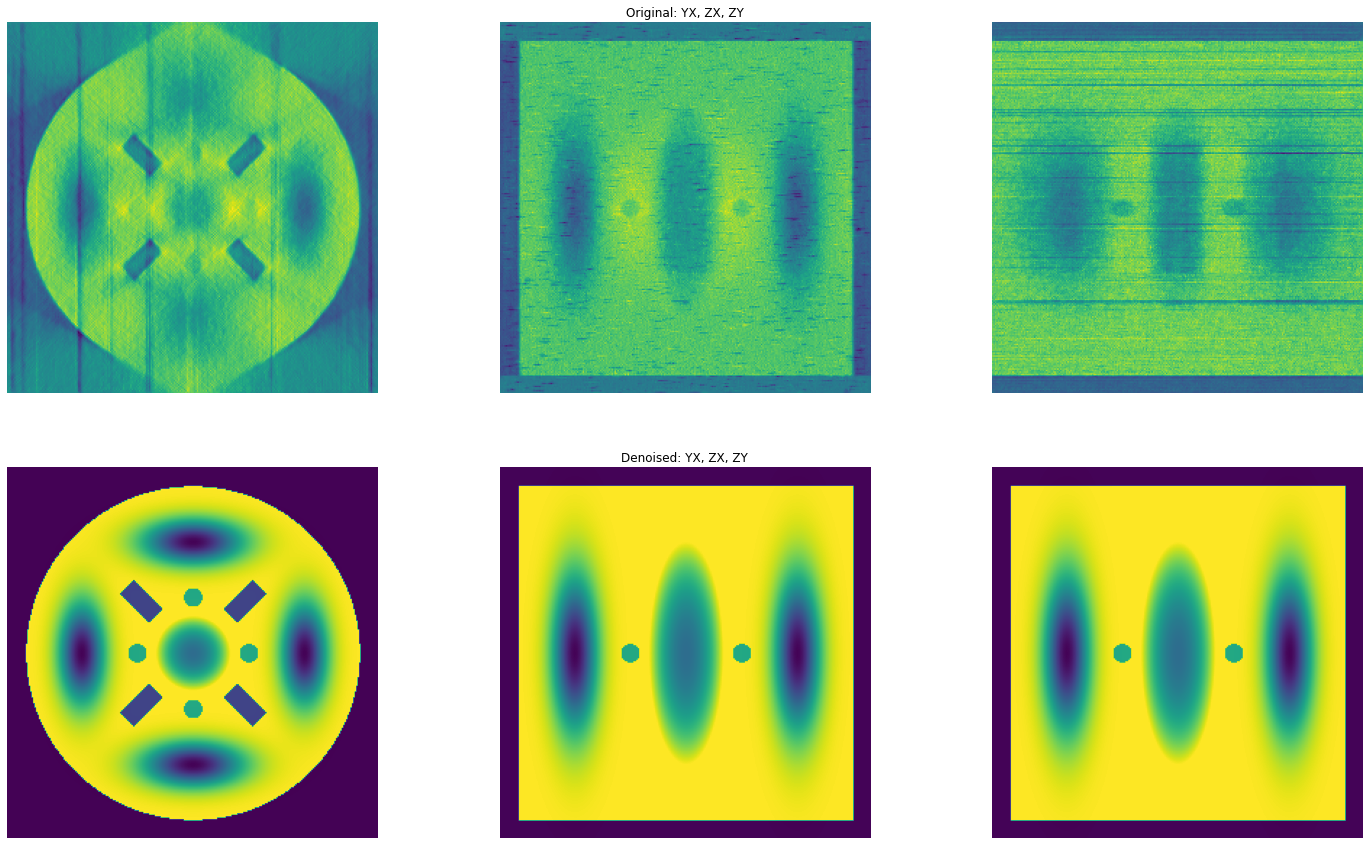

In [17]:
data = read_array('/home/ubuntu/Thesis/data/S2SDenoising/denoised/tomoPhantom_model16_Poisson5000+Gauss5+stripes_n2vDenoised.mrc')
reference = read_array('/home/ubuntu/Thesis/data/S2SDenoising/dummy_tomograms/tomoPhantom_model16.mrc')

zidx, yidx, xidx = np.array(data.shape) // 2

fig, (ax0, ax1) = plt.subplots(2, 3, figsize=(25, 15))
list(map(lambda axi: axi.set_axis_off(), np.array([ax0, ax1]).ravel()))

ax0[1].set_title("Original: YX, ZX, ZY")
ax0[0].imshow(data[zidx])
ax0[1].imshow(data[:, yidx, :])
ax0[2].imshow(data[:, :, xidx])

ax1[1].set_title("Denoised: YX, ZX, ZY")
ax1[0].imshow(reference[zidx])
ax1[1].imshow(reference[:, yidx, :])
ax1[2].imshow(reference[:, :, xidx])